### Mengimport library yang diperlukan

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk # Stopwor
nltk.download('stopwords')
from nltk.corpus import stopwords
import swifter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Membaca Data

In [25]:
df = pd.read_csv('df_clean.csv')

# Data Cleaning
* Menghapus Kolom "Unnamed: 0"
* Normalisasi Singkatan
* Stopword
* Stemming

> Menghapus Kolom 

In [26]:
del df['Unnamed: 0']
df.drop('reviewId', axis=1)

,content,label
0,saya suka dengan aplikasi ini benar benar memu...,0.0
1,halo saya pengguna lama dari tahun awalnya say...,1.0
2,sejak tgl juni saya transaksi flip ke btn stat...,0.0
3,sekarang lbh ribet kl mau validasi status tran...,0.0
4,aplikasi nya bagus sih cuman sayang fitur prin...,1.0
...,...,...
984,tranfer biaya admin termurah,1.0
985,bagus semua transaksi untuk beli pulsa listrik...,1.0
986,aplikasi terbaik sangat fungsional bikin kanto...,1.0
987,selalu lancar dan terbaik lah,1.0


> Normalisasi Singkatan

In [27]:
# Normalisasi
normalized_word = pd.read_csv("kamussingkatan.csv")

normalized_word_dict = {}

kontraksi = normalized_word['singkatan'].to_list()
real_text = normalized_word['asli'].to_list()

regex_format = ["(?:^|\W)" + kata + "(?:$|\W)" for kata in kontraksi]
real_text_space = [" " + kata + " " for kata in real_text]

df['content'] = df['content'].replace(regex_format, real_text_space, regex=True)

In [35]:
df['content'].head()

0    saya suka dengan aplikasi ini benar benar muda...
1    halo saya guna lama dari tahun awal saya sanga...
2    sejak tanggal juni saya transaksi flip ke btn ...
3    sekarang lebih ribet kalau mau validasi status...
4    aplikasi nya bagus sih hanya sayang fitur prin...
Name: content, dtype: object

> Stopword

In [28]:
list_stopwords = stopwords.words('indonesian')
# membaca txt stopword menggunakan pandas
txt_stopword = pd.read_csv("stopwordsID.csv", names= ["stopwords"], header = None)

# convert stopword string ke list & append stopword tambahan
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# convert list ke dictionary
list_stopwords = set(list_stopwords)


# remove stopword pada list token
def stopwords_removal(words):
    return ''.join([word for word in words
                    if word not in list_stopwords])

df['content'] = df['content'].apply(stopwords_removal) 

In [34]:
df['content'].head()

0    saya suka dengan aplikasi ini benar benar muda...
1    halo saya guna lama dari tahun awal saya sanga...
2    sejak tanggal juni saya transaksi flip ke btn ...
3    sekarang lebih ribet kalau mau validasi status...
4    aplikasi nya bagus sih hanya sayang fitur prin...
Name: content, dtype: object

> Stemming

In [29]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['content'] = df['content'].apply(lambda x : stemmer.stem(x))

# Visualisasi Data 
* Pie Chart
* Word Cloud

> Pie Chart

Text(0.5, 1.0, 'Distribusi Label')

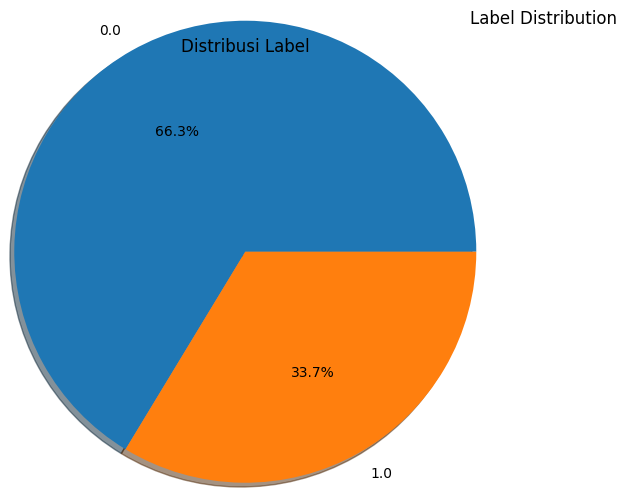

In [30]:
plt.figure(figsize=(15,5)) #pie chart
plt.suptitle("Label Distribution")

#plot pie chart
plt.subplot(1,2,1)
label = df['label'].value_counts().index
label_count = df['label'].value_counts().values
plt.pie(data=df, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1.5)
plt.title('Distribusi Label')

> Word Cloud Positif

(-0.5, 399.5, 199.5, -0.5)

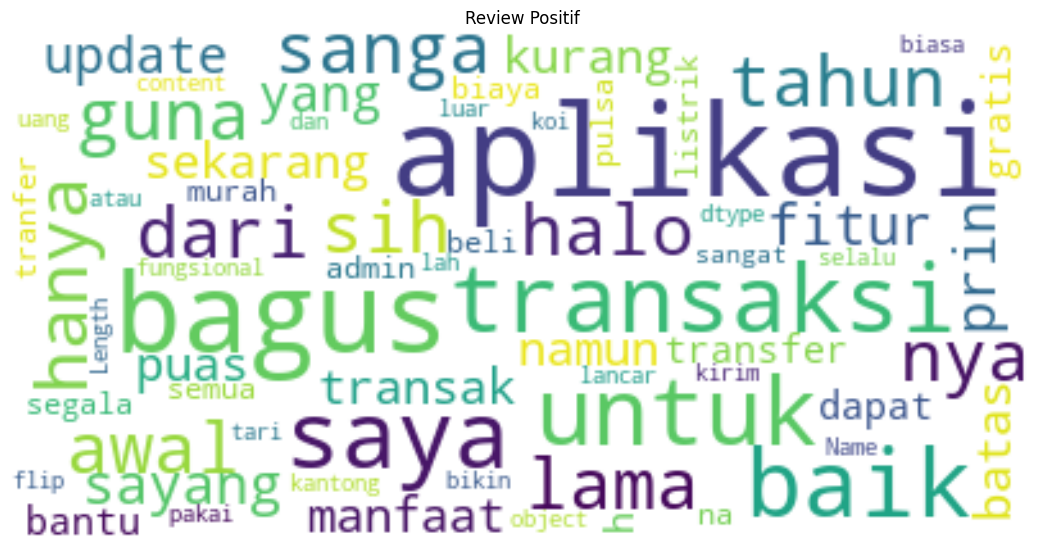

In [31]:
plt.figure(figsize=(45, 45))
positif_label = df['content'][df["label"] == 1]
positif_wordcloud = WordCloud(max_font_size=50, max_words=100,
                               background_color="white").generate(str(positif_label))
plt.subplot(1, 3, 1)
plt.title("Review Positif")
plt.imshow(positif_wordcloud, interpolation="bilinear")
plt.axis("off")

> Word Cloud Negatif

(-0.5, 399.5, 199.5, -0.5)

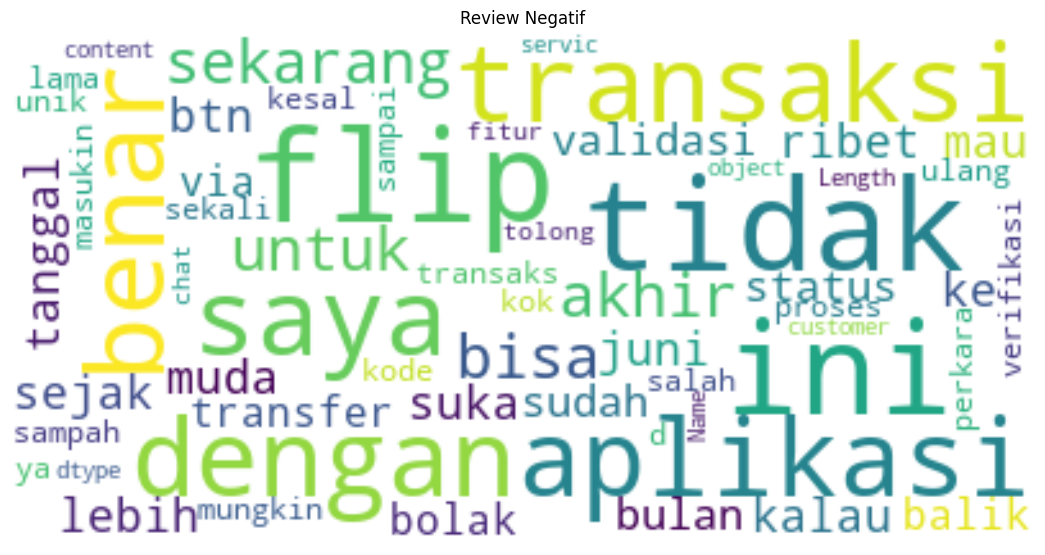

In [32]:
plt.figure(figsize=(45, 45))
negatif_label = df['content'][df["label"] == 0]
negatif_wordcloud = WordCloud(max_font_size=50, max_words=100, 
                              background_color="white").generate(str(negatif_label))
plt.subplot(1, 3, 2)
plt.title("Review Negatif")
plt.imshow(negatif_wordcloud, interpolation="bilinear")
plt.axis("off")

# Export Ke CSV 

In [33]:
df.to_csv('df_final.csv')